In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
#matplotlib.style.use('tableau-colorblind10')
matplotlib.style.use('seaborn-colorblind')
#matplotlib.rcParams.update({'font.size': 30})
rc={'axes.labelsize': 18, 
    'font.size': 20, 
    'legend.fontsize': 18.0, 
    'axes.titlesize': 20,
    'grid.linewidth': 0.5,
    'grid.linestyle': ':',
    'lines.linewidth': 2.0}
plt.rcParams.update(**rc)

In [2]:
confirmed = pd.read_csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
death = pd.read_csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
recovered = pd.read_csv("../COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")
#global_confirmed = pd.read_csv("COVID-19/who_covid_19_situation_reports/who_covid_19_sit_rep_time_series/who_covid_19_sit_rep_time_series.csv")
#global_confirmed = global_confirmed[global_confirmed['Country/Region'] == 'Globally']

In [3]:
#confirmed[confirmed['Country/Region'].str.startswith('glob')]
#global_confirmed

In [4]:
confirmed[confirmed['Country/Region'].str.startswith('Aus')]
#confirmed[confirmed['Country/Region'].str.startswith('Italy')]
#confirmed[confirmed['Country/Region'].str.startswith('Mex')]
#confirmed[confirmed['Country/Region'].str.startswith('China')]
#confirmed[]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,48,55,65,65,92,112,134,171,210,267
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,15,18,21,21,36,49,57,71,94,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,18,20,20,35,46,61,68,78,94
19,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,7,7,9,9,16,19,20,29,29,37
22,From Diamond Princess,Australia,35.4437,139.6380,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,NaN,Austria,47.5162,14.5501,0,0,0,0,0,0,...,131,182,246,302,504,655,860,1018,1332,1646
49,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,4,6,9,9,14,17,17,28,31,35
61,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,2,2,3,3,5,5,6,7,7,10
71,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
402,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,2,3


In [5]:
death[death['Country/Region'].str.startswith('China')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
154,Hubei,China,30.9756,112.2707,17,17,24,40,52,76,...,3008,3024,3046,3056,3062,3075,3085,3099,3111,3122
158,Guangdong,China,23.3417,113.4244,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
159,Henan,China,33.8820,113.6140,0,0,0,0,1,1,...,22,22,22,22,22,22,22,22,22,22
160,Zhejiang,China,29.1832,120.0934,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
161,Hunan,China,27.6104,111.7088,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
162,Anhui,China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
163,Jiangxi,China,27.6140,115.7221,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
164,Shandong,China,36.3427,118.1498,0,0,0,0,0,0,...,6,6,6,6,7,7,7,7,7,7
166,Jiangsu,China,32.9711,119.4550,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,Chongqing,China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [6]:
days_back = 50

In [7]:
indizes = {'Mexico': 46, 'Germany': 11, 'Sweden': 17, 'Italy': 16, 'Austria': 32}#, 'Hubei':154}
countries = indizes
#countries = {'Germany': 11, 'Sweden': 17, 'Italy': 16, 'Austria': 32}
people = {'Germany': 82.79, 'Sweden': 10.12, 'Italy': 60.48, 'Austria': 8.822, 'China': 1386, 'USA':327.2, 'France':66.99, 'Mexico':129.2, 'Hubei':57.2}
conf = {k: np.array(confirmed[confirmed['Country/Region'] == k].T[v].tolist()[-days_back:]) for k, v in countries.items()}
conf['USA'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('US')][0:53].sum(axis=0)[-days_back:].tolist())
conf['China'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('Chin')][0:53].sum(axis=0)[-days_back:].tolist())
conf['France'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('France')][0:53].sum(axis=0)[-days_back:].tolist())

confPerMillion = {k: np.array(confirmed[confirmed['Country/Region'] == k].T[v].tolist()[-days_back:])/people[k] for k, v in countries.items()}
confPerMillion['USA'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('US')][0:53].sum(axis=0)[-days_back:].tolist())/people['USA']
confPerMillion['China'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('Chin')][0:53].sum(axis=0)[-days_back:].tolist())/people['China']
confPerMillion['France'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('France')][0:53].sum(axis=0)[-days_back:].tolist())/people['France']

deaths = {k: np.array(death[death['Country/Region'] == k].T[v].tolist()[-days_back:]) for k, v in countries.items()}
deaths['USA'] = np.array(death[death['Country/Region'].str.startswith('US')][0:53].sum(axis=0)[-days_back:].tolist())
deaths['China'] = np.array(death[death['Country/Region'].str.startswith('Chin')][0:53].sum(axis=0)[-days_back:].tolist())
deaths['France'] = np.array(death[death['Country/Region'].str.startswith('France')][0:53].sum(axis=0)[-days_back:].tolist())
deaths

{'Mexico': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'Germany': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  2,  2,  3,  3,  7,  9, 11, 17, 24, 28]),
 'Sweden': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  3,  6,  7, 10]),
 'Italy': array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    2,    3,    7,   10,   12,   17,   21,   29,   34,
          52,   79,  107,  148,  197,  233,  366,  463,  631,  827,  827,
        1266, 1441, 1809, 2158, 2503

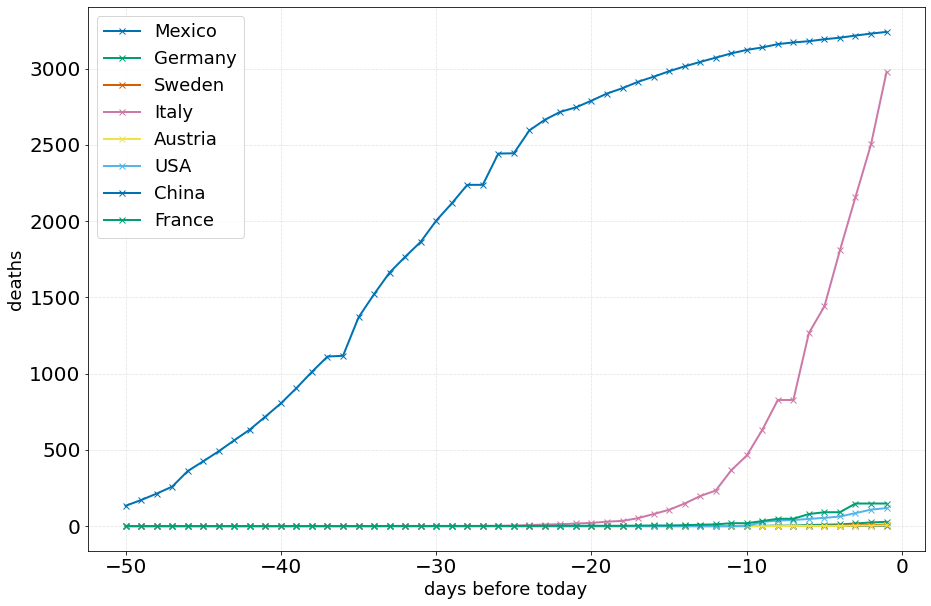

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
for country, data in deaths.items():
    ax.plot(range(-days_back, 0), data, 'x-', label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('deaths')
ax.grid()

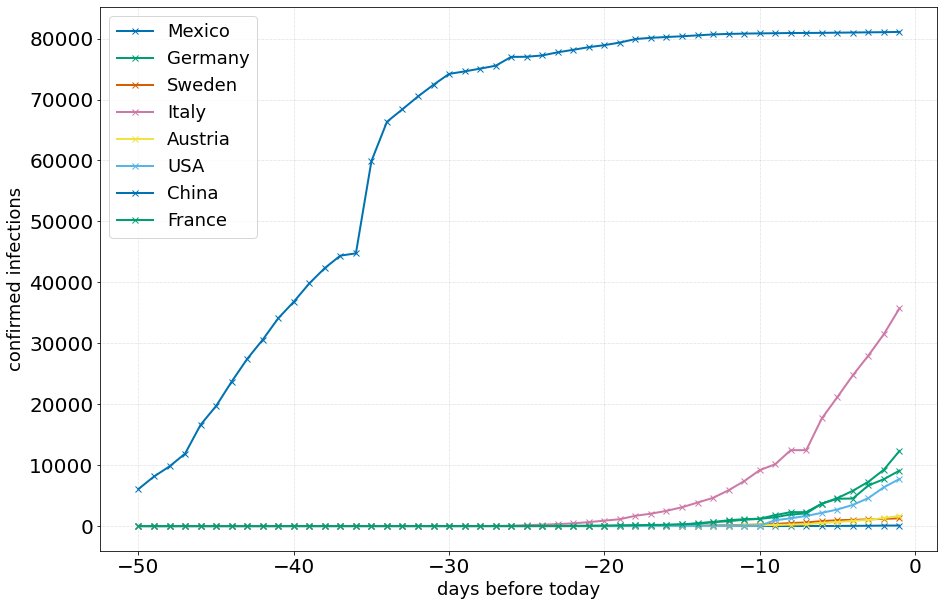

In [9]:
# Deaths
fig, ax = plt.subplots(figsize=(15,10))
for country, data in conf.items():
    ax.plot(range(-days_back, 0), data, 'x-', label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('confirmed infections')
ax.grid()

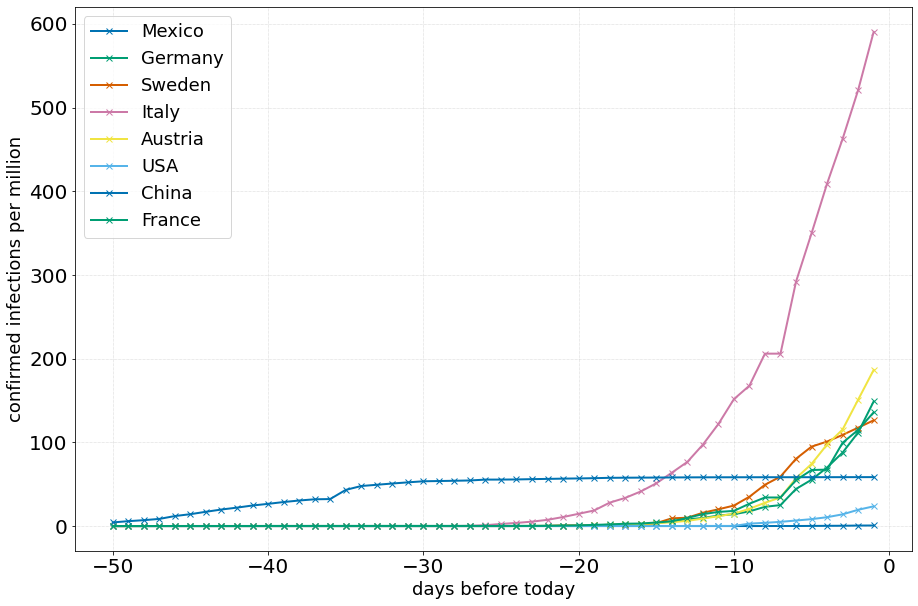

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
for country, data in confPerMillion.items():
    ax.plot(range(-days_back, 0), data, 'x-', label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('confirmed infections per million')
ax.grid()

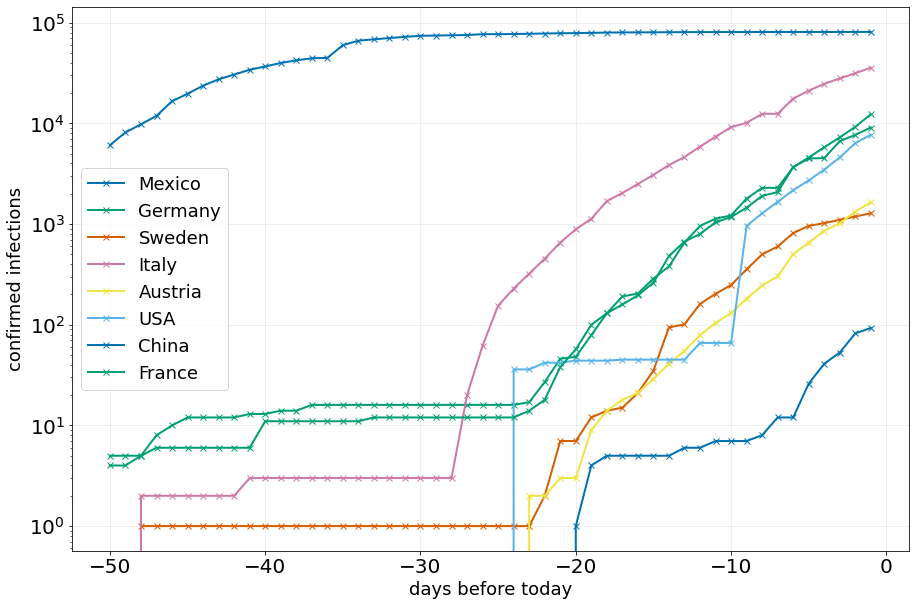

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
for country, data in conf.items():
    ax.semilogy(range(-days_back, 0), data, 'x-', label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('confirmed infections')
ax.grid()

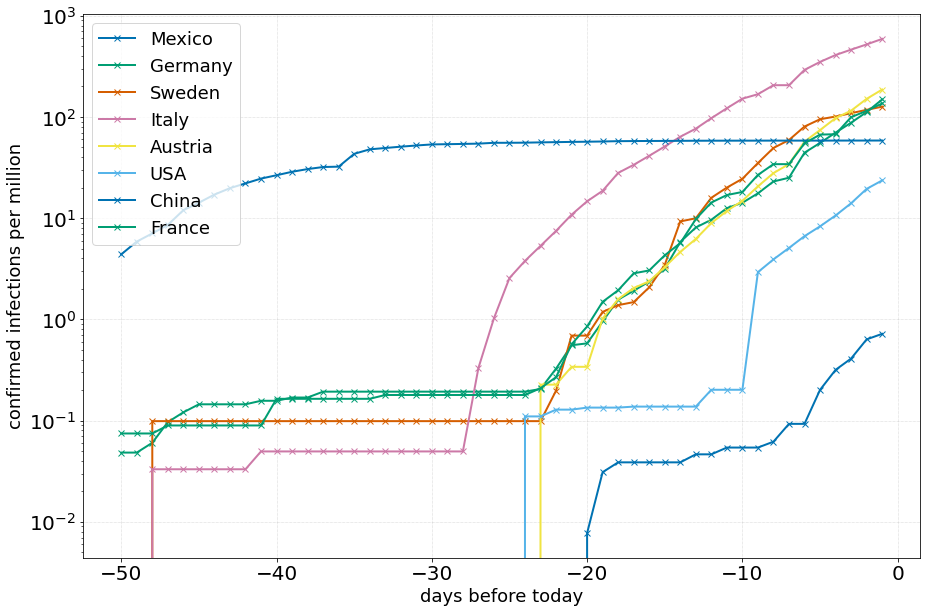

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
for country, data in confPerMillion.items():
    ax.semilogy(range(-days_back, 0), data, 'x-', label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('confirmed infections per million')
ax.grid()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid do

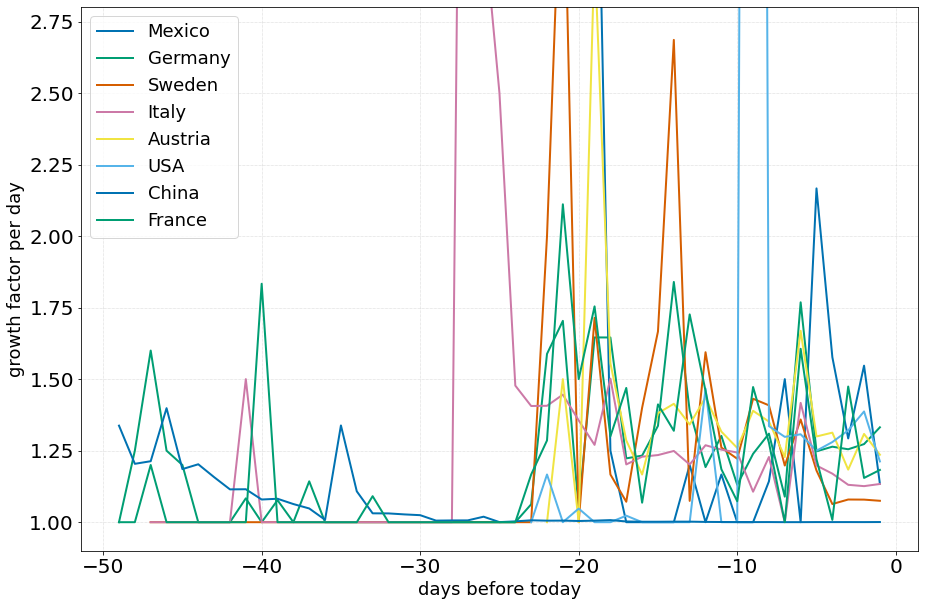

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
for country, data in conf.items():
    ax.plot(range(-days_back + 1, 0), data[1:] / data[:-1], label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('growth factor per day')
ax.set_ylim((0.9,2.8))
ax.grid()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid d

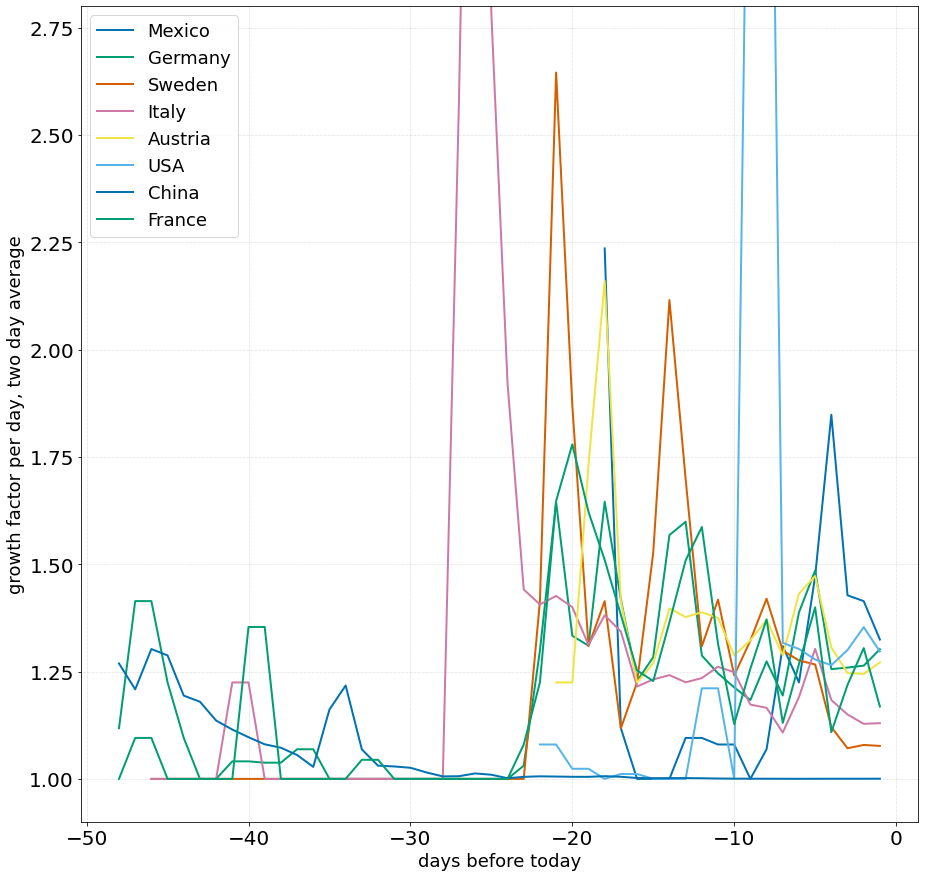

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
for country, data in conf.items():
    ax.plot(range(-days_back + 2, 0), np.sqrt(data[2:] / data[:-2]), label=country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('growth factor per day, two day average')
ax.set_ylim((0.9,2.8))
ax.grid()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide 

Text(0.0, 1.0, '2020-03-19')

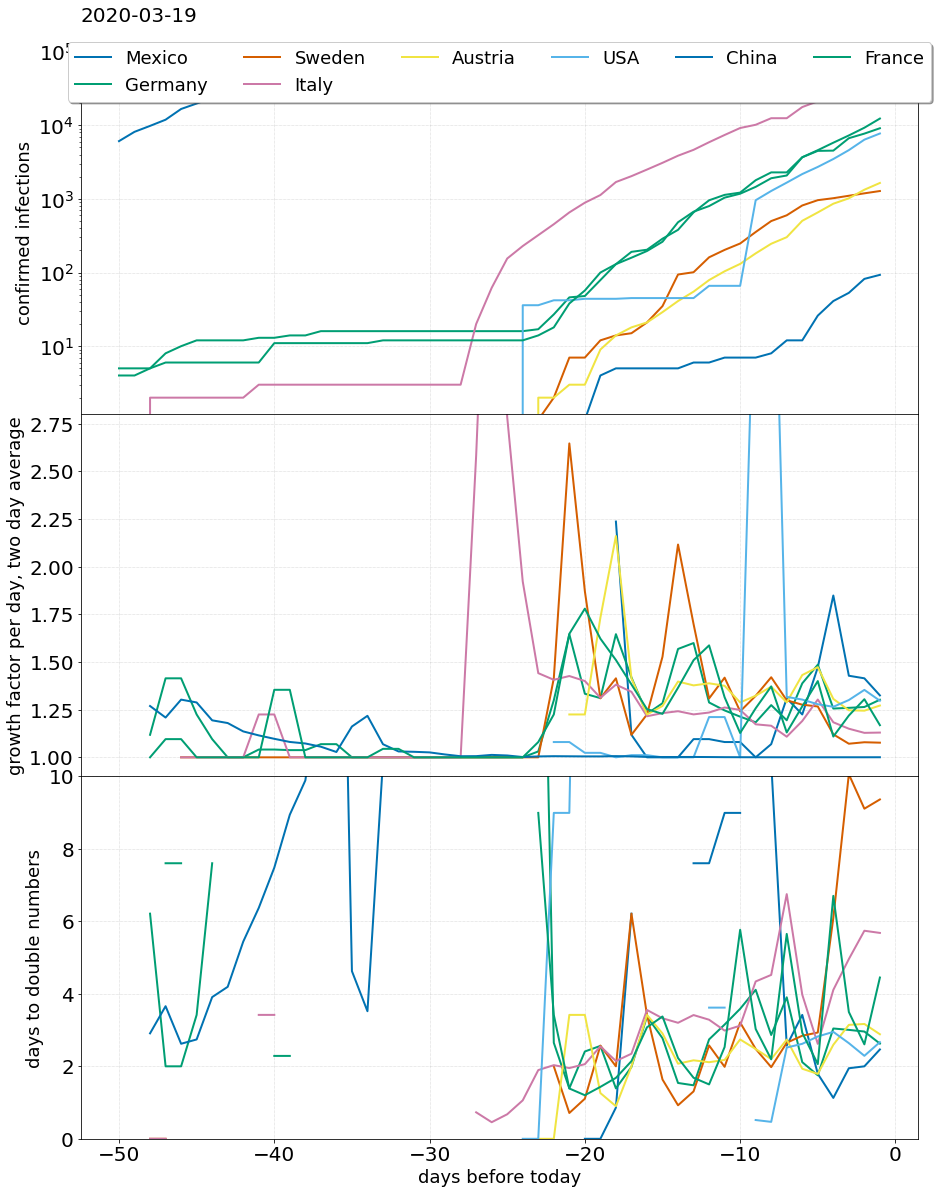

In [15]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(15,20))
plt.subplots_adjust(wspace=0, hspace=0)

for country, data in conf.items():
    axs[0].semilogy(range(-days_back, 0), data, label=country)
    #axs[1].plot(range(-days_back + 1, 0), data[1:] / data[:-1], label=country)
    axs[2].plot(range(-days_back + 2, 0), np.log(2)/np.log(np.sqrt(data[2:] / data[:-2])), label=country)
    axs[1].plot(range(-days_back + 2, 0), np.sqrt(data[2:] / data[:-2]), label=country)
#axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#              fancybox=True, shadow=True, ncol=5)
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
              fancybox=True, shadow=True, ncol=6)


axs[2].set_xlabel('days before today')
axs[0].set_ylabel('confirmed infections')
axs[1].set_ylabel('growth factor per day, two day average')
axs[2].set_ylabel('days to double numbers')

axs[0].set_ylim((1.2,1e5))
axs[1].set_ylim((0.9,2.8))
axs[2].set_ylim((0.,10.))

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_title(f"{datetime.datetime.now():%Y-%m-%d}", loc='left', pad=30)

In [16]:
# Plot per country
country='Germany'
countries = {country: indizes[country]}
#countries = {country: indizes[country], 'Italy': 16}
conf = {k: np.array(confirmed[confirmed['Country/Region'] == k].T[v].tolist()[-days_back:]) for k, v in countries.items()}
#conf['USA'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('US')][0:53].sum(axis=0)[-days_back:].tolist())
#conf
deaths = {k: np.array(death[death['Country/Region'] == k].T[v].tolist()[-days_back:]) for k, v in countries.items()}
#conf['USA'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('US')][0:53].sum(axis=0)[-days_back:].tolist())
#deaths
reco = {k: np.array(recovered[recovered['Country/Region'] == k].T[v].tolist()[-days_back:]) for k, v in countries.items()}
#conf['USA'] = np.array(confirmed[confirmed['Country/Region'].str.startswith('US')][0:53].sum(axis=0)[-days_back:].tolist())
#reco

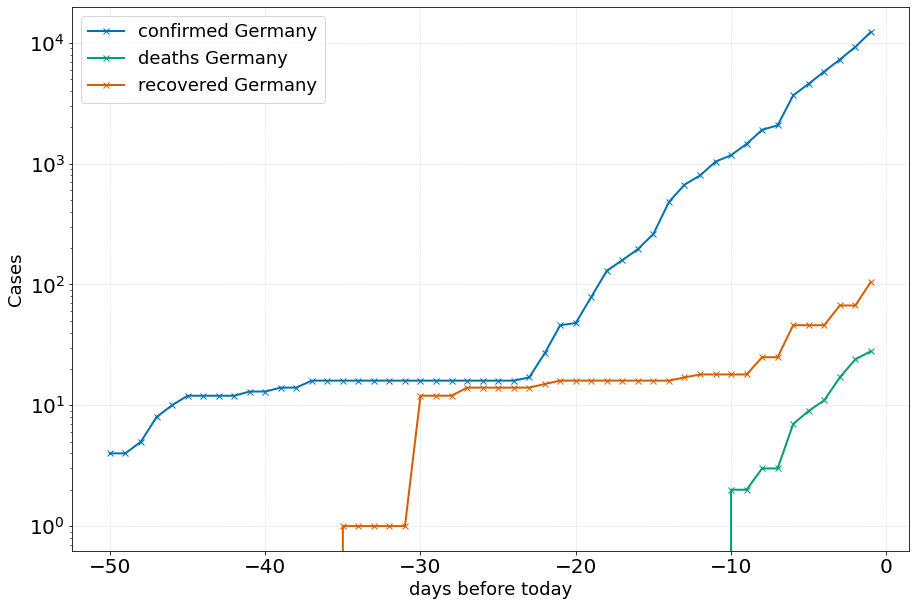

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

for country, data in conf.items():
#    ax.semilogy(range(-days_back, 0), data, 'x-', label=country)
    ax.semilogy(range(-days_back, 0), conf[country], 'x-', label="confirmed "+country)
    ax.semilogy(range(-days_back, 0), deaths[country], 'x-', label="deaths "+ country)
    ax.semilogy(range(-days_back, 0), reco[country], 'x-', label="recovered "+ country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('Cases')
ax.grid()

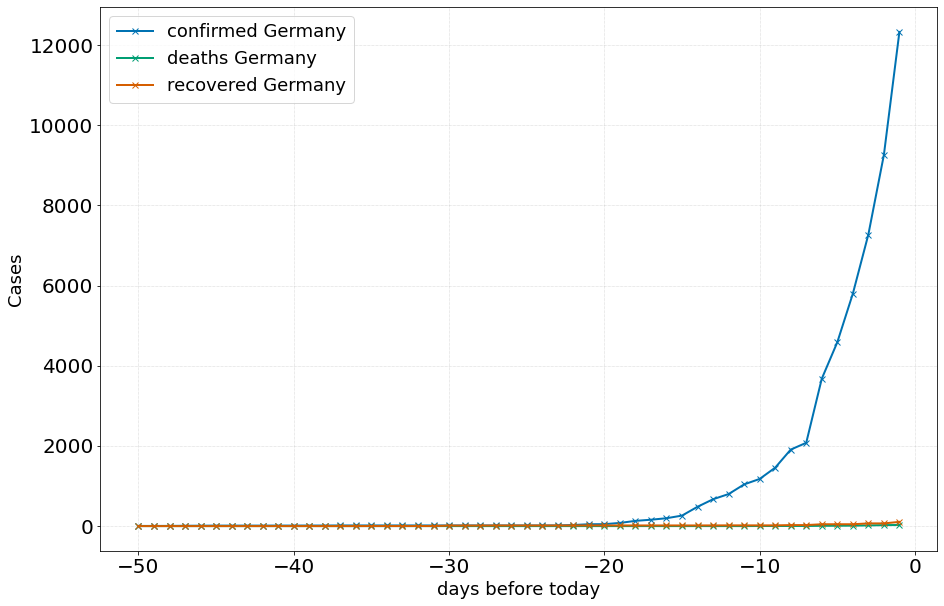

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
for country, data in conf.items():
#    ax.semilogy(range(-days_back, 0), data, 'x-', label=country)
    ax.plot(range(-days_back, 0), conf[country], 'x-', label="confirmed "+country)
    ax.plot(range(-days_back, 0), deaths[country], 'x-', label="deaths "+country)
    ax.plot(range(-days_back, 0), reco[country], 'x-', label="recovered "+country)
ax.legend()
ax.set_xlabel('days before today')
ax.set_ylabel('Cases')
ax.grid()